# Simple Linear Regression


In [1]:
from warnings import filterwarnings
filterwarnings("ignore")


Step 1 Read Dataset

In [2]:
import pandas as pd
df=pd.read_csv("50_Startups.csv")
df.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### I want understand relationship between RND and PROFIT
PROFIT ~ RND
Profit_pred = B0 + B1*RND
X = RND, Y = PROFIT


In [3]:
x=df [["RND"]]
y=df [["PROFIT"]]

In [4]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [5]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


<Axes: xlabel='RND', ylabel='PROFIT'>

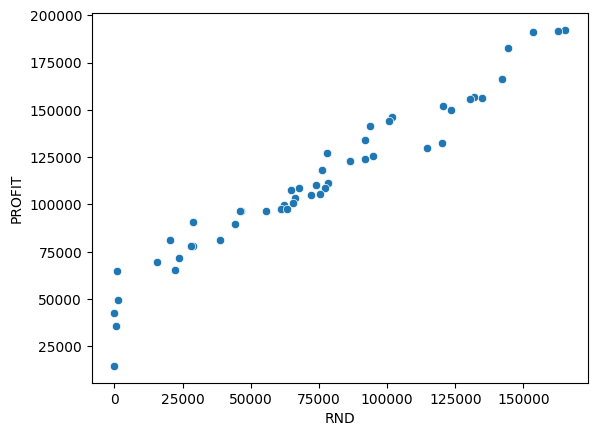

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")


### Step 3- perform Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


### Get slope and  intercept

In [ ]:
model.intercept_

array([49032.89914125])

## Profit_pred = 49032.9 + 0.8543*RND

### Regression plot

<Axes: xlabel='RND', ylabel='PROFIT'>

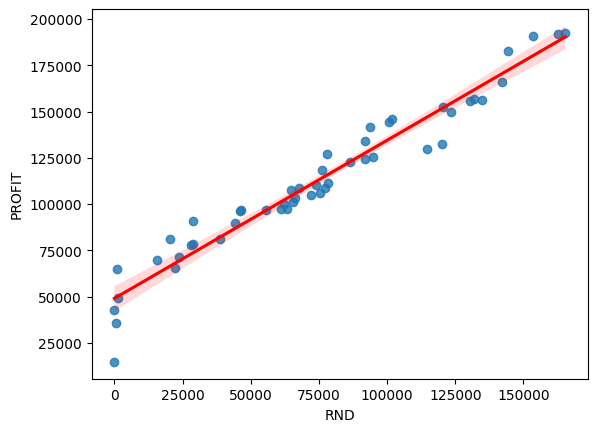

In [ ]:
sns.regplot (data= df , x="RND" , y= "PROFIT" , line_kws={"color": "red"})

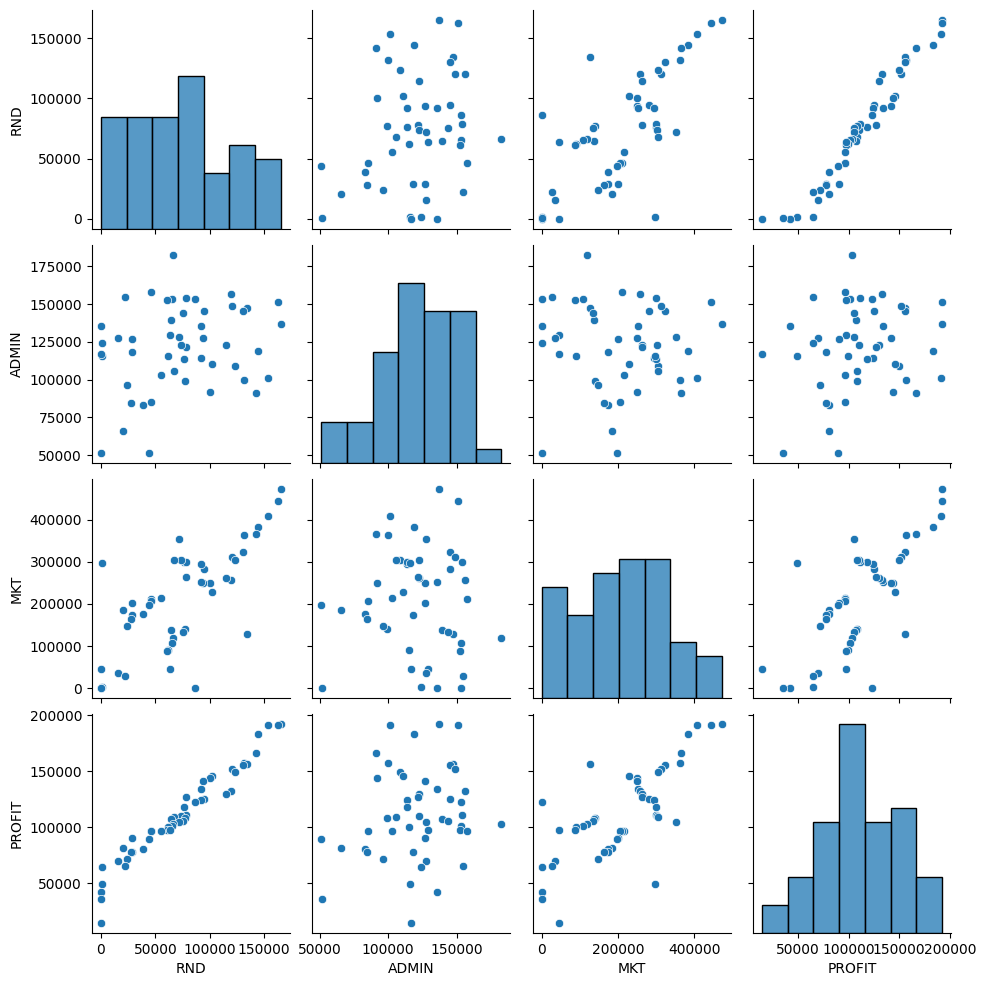

In [ ]:
sns.pairplot(data=df)

In [ ]:
ypred = model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

### Model evaluation

1 root mean squared error (std error)

2 Mean Absoulte Error

3 R2 Score

In [ ]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)

In [ ]:
def evaluate_model(model, x,y):
    # predict the results for x
    ypred = model.predict(x)
    #Evaluate the metrices
    rmse =root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    r2 = r2_score (y,ypred)
# print the metrices
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE : {mape:.4f}")
print(f"R2 Score : {R2:.4f}")



NameError: name 'rmse' is not defined